In [46]:
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (14,10)

In [47]:
df, info = tfds.load('malaria', 
                     with_info=True, 
                     as_supervised=True,
                     shuffle_files=True,
                     )

In [48]:
print(info)

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir='/Users/ansh/tensorflow_datasets/malaria/1.0.0',
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria p

In [49]:
df

{'train': <_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [50]:
for data in df['train'].take(3):
    print(data)

(<tf.Tensor: shape=(103, 103, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], shape=(103, 103, 3), dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)
(<tf.Tensor: shape=(106, 121, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
     

In [51]:
df = df['train']

In [52]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DF_SIZE = len(df)

X_train = df.take(int(TRAIN_RATIO*DF_SIZE))
X_val = df.skip(int(TRAIN_RATIO*DF_SIZE))
X_val = X_val.take(int(VAL_RATIO*DF_SIZE))
X_test = df.skip(int((TRAIN_RATIO+VAL_RATIO)*DF_SIZE))
X_test = X_test.take(int(TEST_RATIO*DF_SIZE))

In [53]:
X_train

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [54]:
X_val

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [55]:
X_test

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

2025-10-05 18:18:26.578117: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


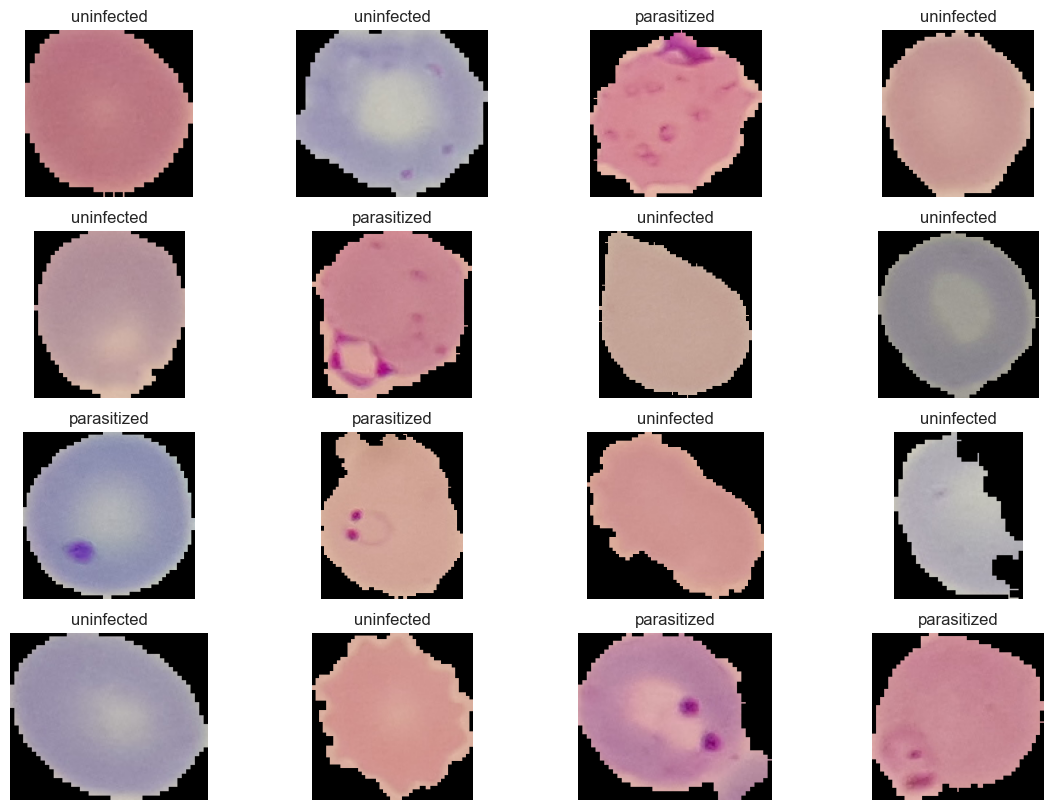

In [56]:
for i, (image, label) in enumerate(X_train.take(16)):
    ax = plt.subplot(4,4,i+1)
    plt.imshow(image)
    plt.title(info.features['label'].int2str(label))
    plt.axis('off')

In [57]:
IM_SIZE = 128
def resize_rescale(image, label):
    return tf.image.resize(image, (IM_SIZE, IM_SIZE))/255, label

In [58]:
X_train = X_train.map(resize_rescale)
X_val = X_val.map(resize_rescale)
X_test = X_test.map(resize_rescale)

In [59]:
for image, label in X_train.take(1):
    print(image)
    print(label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(128, 128, 3), dtype=float32)
tf.Tensor(1, shape=(), dtype=int64)


In [60]:
X_train = X_train.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)
X_val = X_val.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [61]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(IM_SIZE, IM_SIZE, 3)),

    tf.keras.layers.Conv2D(filters=6, kernel_size=4, strides=1, padding='valid', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(filters=8, kernel_size=4, strides=1, padding='valid', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.GlobalAveragePooling2D(),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [62]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 6)    │           294 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 125, 125, 6)    │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 59, 59, 8)      │           776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 59, 59, 8)      │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 29, 29, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 8)              │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,407 (40.65 KB)

 Trainable params: 10,251 (40.04 KB)

 Non-trainable params: 156 (624.00 B)

In [63]:
bce = tf.keras.losses.BinaryCrossentropy()

In [64]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC
from tensorflow.keras.layers import Layer

model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss="binary_crossentropy",
    metrics=["accuracy", AUC(name="auc")]
)


In [65]:
from tensorflow.keras.callbacks import ModelCheckpoint


# Save the model with the best val_loss
checkpoint = ModelCheckpoint(
    "best_model.keras",        # filename where best model will be saved
    monitor="val_loss",
    save_best_only=True,
    mode="min"                 # "min" because we want lowest val_loss
)

In [66]:
history = model.fit(
    X_train,
    validation_data=X_val,
    epochs=20,
    callbacks=[checkpoint]
)


Epoch 1/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 33s 46ms/step - accuracy: 0.7873 - auc: 0.8772 - loss: 0.4388 - val_accuracy: 0.6123 - val_auc: 0.8994 - val_loss: 1.3239
Epoch 2/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 32s 46ms/step - accuracy: 0.9325 - auc: 0.9748 - loss: 0.1914 - val_accuracy: 0.9405 - val_auc: 0.9842 - val_loss: 0.1607
Epoch 3/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 33s 48ms/step - accuracy: 0.9423 - auc: 0.9797 - loss: 0.1682 - val_accuracy: 0.9437 - val_auc: 0.9849 - val_loss: 0.1663
Epoch 4/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 33s 48ms/step - accuracy: 0.9466 - auc: 0.9819 - loss: 0.1576 - val_accuracy: 0.9307 - val_auc: 0.9779 - val_loss: 0.2106
Epoch 5/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 34s 50ms/step - accuracy: 0.9495 - auc: 0.9828 - loss: 0.1525 - val_accuracy: 0.9249 - val_auc: 0.9809 - val_loss: 0.2297
Epoch 6/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 35s 51ms/step - accuracy: 0.9499 - auc: 0.9833 - loss: 0.1490 - val_accuracy: 0.9212 - val_auc: 0.9835 - val_loss: 0.2373
Epoch 7/20
689/689 ━━━━━━━━━

In [67]:
X_test = X_test.batch(1)

In [68]:
model.evaluate(X_test)

2755/2755 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9383 - auc: 0.9835 - loss: 0.1814


[0.18144243955612183, 0.938293993473053, 0.9835308790206909]

In [69]:
from tensorflow.keras.models import load_model

# Load the best saved model
best_model = load_model("best_model.keras")

# Verify it’s the right one
best_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 6)    │           294 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 125, 125, 6)    │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 59, 59, 8)      │           776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 59, 59, 8)      │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 29, 29, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 8)              │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,911 (120.75 KB)

 Trainable params: 10,251 (40.04 KB)

 Non-trainable params: 156 (624.00 B)

 Optimizer params: 20,504 (80.10 KB)

In [70]:
best_model.evaluate(X_test)

2755/2755 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9492 - auc: 0.9843 - loss: 0.1519


[0.15191783010959625, 0.9491832852363586, 0.9843264222145081]

In [71]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, InputLayer, Input, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [72]:
func_input = Input(shape=(IM_SIZE, IM_SIZE, 3), name='Extractor')

x = Conv2D(filters=6, kernel_size=4, strides=1, padding='valid', activation='relu')(func_input)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2,2))(x)

x = Conv2D(filters=8, kernel_size=4, strides=1, padding='valid', activation='relu')(x)
x = BatchNormalization()(x)
output = MaxPool2D(pool_size=(2,2))(x)

feature_extractor = Model(inputs=func_input, outputs=output, name='Extractor')
feature_extractor.summary()

Model: "Extractor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Extractor (InputLayer)          │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 125, 125, 6)    │           294 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 125, 125, 6)    │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 62, 62, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 59, 59, 8)      │           776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 59, 59, 8)      │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 29, 29, 8)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,126 (4.40 KB)

 Trainable params: 1,098 (4.29 KB)

 Non-trainable params: 28 (112.00 B)

In [73]:
func_input = Input(shape=(IM_SIZE, IM_SIZE, 3), name='Model')

x = feature_extractor(func_input)

x = Flatten()(x)

x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu')(x)

output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=func_input, outputs=output, name='Model')
model.summary()

Model: "Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Model (InputLayer)              │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Extractor (Functional)          │ (None, 29, 29, 8)      │         1,126 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6728)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │       430,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 440,487 (1.68 MB)

 Trainable params: 440,331 (1.68 MB)

 Non-trainable params: 156 (624.00 B)

In [74]:
model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss="binary_crossentropy",
    metrics=["accuracy", AUC(name="auc")]
)


In [75]:
history = model.fit(
    X_train,
    validation_data=X_val,
    epochs=1,
    callbacks=[checkpoint]
)


689/689 ━━━━━━━━━━━━━━━━━━━━ 38s 54ms/step - accuracy: 0.8040 - auc: 0.8934 - loss: 0.4091 - val_accuracy: 0.9274 - val_auc: 0.9771 - val_loss: 0.2037


In [76]:
best_model = load_model('best_model.keras')

In [77]:
best_model.evaluate(X_train)

689/689 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9541 - auc: 0.9885 - loss: 0.1370


[0.13700518012046814, 0.954050600528717, 0.9884680509567261]

In [78]:
best_model.evaluate(X_val)

87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9535 - auc: 0.9873 - loss: 0.1402


[0.14020338654518127, 0.9535390138626099, 0.9873142242431641]

In [79]:
best_model.evaluate(X_test)

2755/2755 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9495 - auc: 0.9841 - loss: 0.1529


[0.1529475599527359, 0.9495462775230408, 0.9840981364250183]

In [80]:
from tensorflow.keras.regularizers import l2

In [81]:
class FeatureExtractor(Layer):

    def __init__(self):
        super(FeatureExtractor, self).__init__()

        self.conv1 = Conv2D(filters=6, kernel_size=4, strides=1, padding='valid', activation='relu', kernel_regularizer=l2(0.01))
        self.batch1 = BatchNormalization()
        self.maxpool1 = MaxPool2D(pool_size=(2,2))

        self.conv2 = Conv2D(filters=8, kernel_size=4, strides=1, padding='valid', activation='relu', kernel_regularizer=l2(0.01))
        self.batch2 = BatchNormalization()
        self.maxpool2 = MaxPool2D(pool_size=(2,2))
        self.flatten = Flatten()
        

    def call(self, x):
        
        x = self.conv1(x)
        x = self.batch1(x)
        x = self.maxpool1(x)

        x = self.conv2(x)
        x = self.batch2(x)
        x = self.maxpool2(x)

        x = self.flatten(x)

        return x

In [82]:
from tensorflow.keras import Model  # <-- pull in the actual Keras Model class
from tensorflow.keras.layers import Dropout
from keras.saving import register_keras_serializable

@register_keras_serializable()
class MyModel(tf.keras.Model):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.feature_extractor = FeatureExtractor()
        self.dense64 = Dense(64, activation='relu', kernel_regularizer=l2(0.01))
        self.dropout = Dropout(0.3)
        self.batch_norm = BatchNormalization()
        self.dense128 = Dense(128, activation='relu', kernel_regularizer=l2(0.01))
        self.final = Dense(1, activation='sigmoid')

    def call(self, x):
        x = self.feature_extractor(x)
        x = self.dense64(x)
        x = self.dropout(x)
        x = self.batch_norm(x)
        x = self.dense128(x)
        return self.final(x)


In [83]:
func_input = Input(shape=(IM_SIZE, IM_SIZE, 3), name='my_model')

model = MyModel()

In [84]:
from tensorflow.keras.metrics import Accuracy, FalsePositives, FalseNegatives, TrueNegatives, TruePositives, Precision, Recall, AUC

In [85]:
from tensorflow.keras.metrics import BinaryAccuracy
metrics = [BinaryAccuracy(name='accuracy'),
           Precision(name='precision'),
           Recall(name='recall'),
           AUC(name='auc')]

In [86]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=10,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0
)

In [87]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=metrics
)

In [88]:
from tensorflow.keras.callbacks import Callback, LearningRateScheduler, ReduceLROnPlateau

In [89]:
import os

In [90]:
class MyCallback(Callback):

    def __init__(self):
        super().__init__()
        self.best_val_loss = float("inf")
    
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('val_loss') is not None:
            if logs['val_loss'] < self.best_val_loss:
                self.best_val_loss = logs['val_loss']
                os.system("afplay /System/Library/Sounds/Tink.aiff")
            else:
                os.system("afplay /System/Library/Sounds/Sosumi.aiff")


    def on_train_end(self, logs=None):
        os.system("afplay /System/Library/Sounds/Submarine.aiff")

In [91]:
csv = tf.keras.callbacks.CSVLogger('training_log.csv')

In [92]:
def schedule(epoch, lr):
    if epoch < 15:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [93]:
lr = LearningRateScheduler(schedule=schedule)

In [94]:
checkpoint = ModelCheckpoint(
    "best_model.keras",
    monitor="val_recall",
    save_best_only=True,
    mode="max"   # not "min"
)


In [95]:
lr_plateau = ReduceLROnPlateau(
    monitor='val_recall',
    factor=0.2,
    patience=3,
    verbose=1,
    mode='min',
)   

In [96]:
history = model.fit(
    X_train,
    validation_data=X_val, 
    epochs=50,
    callbacks=[checkpoint, 
               early_stop,
               MyCallback(),
               csv,
               ],
)


Epoch 1/50
689/689 ━━━━━━━━━━━━━━━━━━━━ 37s 52ms/step - accuracy: 0.6227 - auc: 0.6739 - loss: 0.8045 - precision: 0.6214 - recall: 0.6283 - val_accuracy: 0.7140 - val_auc: 0.7907 - val_loss: 0.6536 - val_precision: 0.8185 - val_recall: 0.5555
Epoch 2/50
689/689 ━━━━━━━━━━━━━━━━━━━━ 34s 50ms/step - accuracy: 0.8492 - auc: 0.9102 - loss: 0.4785 - precision: 0.8532 - recall: 0.8436 - val_accuracy: 0.9336 - val_auc: 0.9655 - val_loss: 0.3380 - val_precision: 0.9224 - val_recall: 0.9483
Epoch 3/50
689/689 ━━━━━━━━━━━━━━━━━━━━ 33s 48ms/step - accuracy: 0.9208 - auc: 0.9616 - loss: 0.3221 - precision: 0.9108 - recall: 0.9330 - val_accuracy: 0.9267 - val_auc: 0.9716 - val_loss: 0.2904 - val_precision: 0.9040 - val_recall: 0.9561
Epoch 4/50
689/689 ━━━━━━━━━━━━━━━━━━━━ 33s 48ms/step - accuracy: 0.9262 - auc: 0.9647 - loss: 0.2978 - precision: 0.9210 - recall: 0.9325 - val_accuracy: 0.9256 - val_auc: 0.9694 - val_loss: 0.2954 - val_precision: 0.9576 - val_recall: 0.8922
Epoch 5/50
689/689 ━━━━━

In [97]:
model.evaluate(X_train)

689/689 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9410 - auc: 0.9787 - loss: 0.2225 - precision: 0.9339 - recall: 0.9493


[0.22249941527843475,
 0.9410324096679688,
 0.9338688254356384,
 0.9492878317832947,
 0.9786756634712219]

In [98]:
model.evaluate(X_val)

87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9408 - auc: 0.9785 - loss: 0.2291 - precision: 0.9361 - recall: 0.9476


[0.22910252213478088,
 0.9408348202705383,
 0.9361249208450317,
 0.9475574493408203,
 0.9784557223320007]

In [99]:
model.evaluate(X_test)

2755/2755 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9325 - auc: 0.9720 - loss: 0.2478 - precision: 0.9306 - recall: 0.9333


[0.24780051410198212,
 0.9324864149093628,
 0.9306063055992126,
 0.9333333373069763,
 0.9720139503479004]

In [100]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ feature_extractor               │ ?                      │         1,126 │
│ (FeatureExtractor)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │       430,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,321,151 (5.04 MB)

 Trainable params: 440,331 (1.68 MB)

 Non-trainable params: 156 (624.00 B)

 Optimizer params: 880,664 (3.36 MB)

In [101]:
model = load_model('best_model.keras')

In [102]:
model.evaluate(X_train)

689/689 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9296 - auc: 0.9661 - loss: 0.2530 - precision: 0.8928 - recall: 0.9764


[0.25298017263412476,
 0.9295563697814941,
 0.8927505016326904,
 0.9764129519462585,
 0.9660854935646057]

In [103]:
model.evaluate(X_val)

87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9299 - auc: 0.9664 - loss: 0.2572 - precision: 0.8955 - recall: 0.9748


[0.25718653202056885,
 0.9299455285072327,
 0.8955026268959045,
 0.9748020172119141,
 0.966364860534668]

In [104]:
model.evaluate(X_test)

2755/2755 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9278 - auc: 0.9603 - loss: 0.2642 - precision: 0.8911 - recall: 0.9728


[0.2642287611961365,
 0.9277676939964294,
 0.8910558223724365,
 0.972834050655365,
 0.9603402614593506]

In [105]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ feature_extractor_1             │ ?                      │         1,126 │
│ (FeatureExtractor)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │       430,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,321,151 (5.04 MB)

 Trainable params: 440,331 (1.68 MB)

 Non-trainable params: 156 (624.00 B)

 Optimizer params: 880,664 (3.36 MB)

In [106]:
sns.set_style('darkgrid')

In [107]:
from sklearn.metrics import confusion_matrix

In [108]:
labels = []
inp = []

for x,y in X_test.as_numpy_iterator():
    labels.append(y)
    inp.append(x)

In [109]:
labels

[array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),

In [110]:
labels = np.array([i[0] for i in labels])
inp = np.array([i[0] for i in inp])

In [111]:
labels

array([0, 0, 1, ..., 0, 1, 0], shape=(2755,))

In [112]:
inp

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 

In [113]:
inp.shape

(2755, 128, 128, 3)

In [114]:
X_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [115]:
labels.shape

(2755,)

In [116]:
predictions = model.predict(inp)

87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


In [117]:
predictions

array([[0.00772379],
       [0.01282993],
       [0.92080146],
       ...,
       [0.01108478],
       [0.9047557 ],
       [0.75463617]], shape=(2755, 1), dtype=float32)

[[1195  198]
 [  34 1328]]


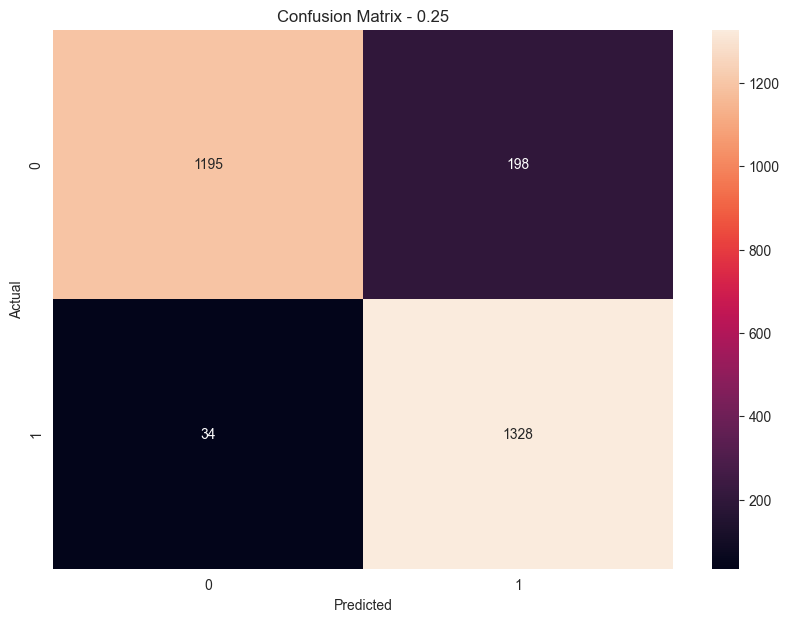

In [118]:
threshold = 0.25 

cm = confusion_matrix(labels, predictions>threshold)
print(cm)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix - {}'.format(threshold))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [119]:
from sklearn.metrics import roc_curve

In [120]:
fp, tp, thresholds = roc_curve(labels, predictions) 

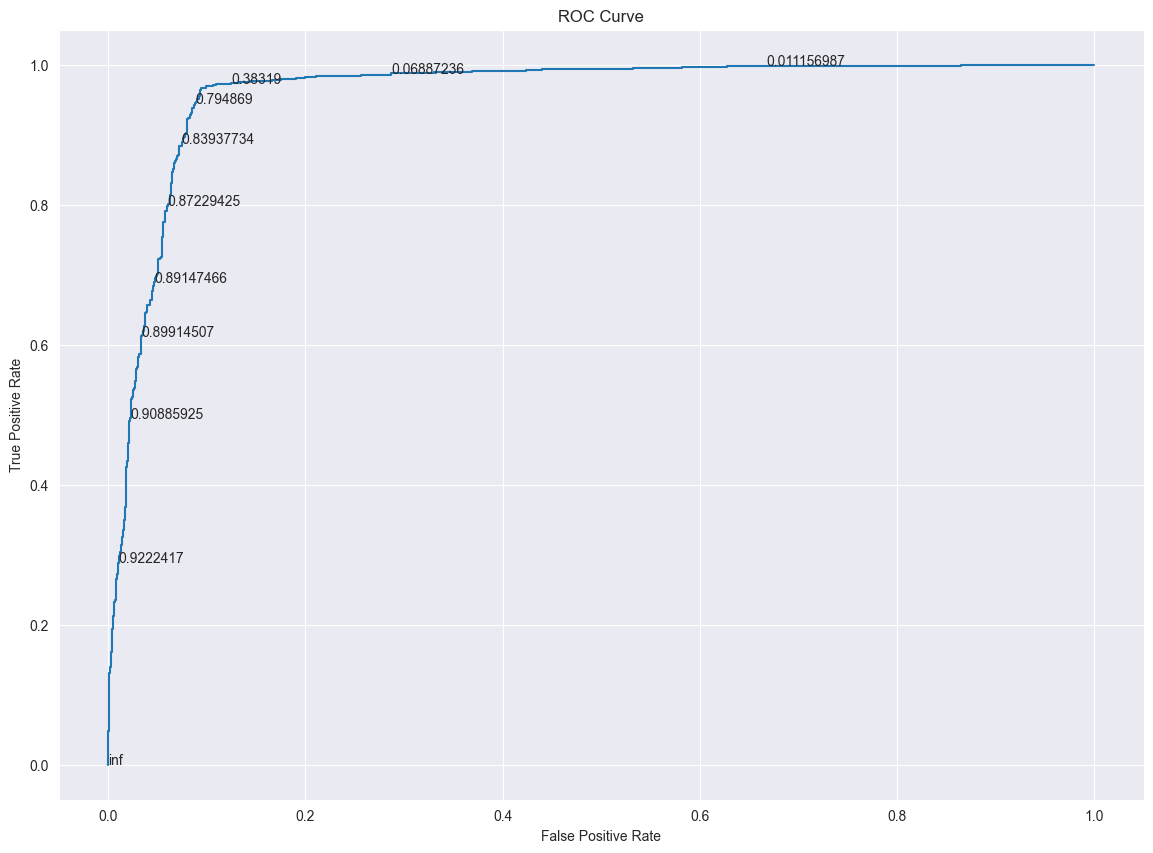

In [121]:
plt.plot(fp, tp)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid(True)
for i in range(0, len(thresholds), 30):
    plt.text(fp[i], tp[i], thresholds[i])


plt.show()